## Import & transform Amsterdam Data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
os.getcwd()

'C:\\Users\\RianneRendering\\Project_2_Amsterdam_dataptams2020\\your-project'

In [2]:
adam = pd.read_csv('..\\data\\rental_data_amsterdam_final.csv')

#Inspect data
adam.head()

,Unnamed: 0,house_price_amsterdam,rental_agency_amsterdam,postcode_amsterdam,bedrooms_amsterdam,surface_amsterdam
0,0,2750.0,Out Amsterdam,1078JP,4,129
1,1,1350.0,Hevesta Bemiddeling,1055MR,1,37
2,2,2000.0,ViaDaan,1082TC,3,75
3,3,1700.0,Expats. Amsterdam Rentals,1072NN,3,55
4,4,1400.0,Hoofdstad Makelaars,1106CW,3,75


In [3]:
#Transform columns
adam = adam.rename(columns={"house_price_amsterdam": "rental_price", "rental_agency_amsterdam": "rental_agency", "postcode_amsterdam": "postcode", "bedrooms_amsterdam": "bedrooms", "surface_amsterdam": "surface"})
adam = adam.drop('Unnamed: 0', axis=1)
adam.head()

,rental_price,rental_agency,postcode,bedrooms,surface
0,2750.0,Out Amsterdam,1078JP,4,129
1,1350.0,Hevesta Bemiddeling,1055MR,1,37
2,2000.0,ViaDaan,1082TC,3,75
3,1700.0,Expats. Amsterdam Rentals,1072NN,3,55
4,1400.0,Hoofdstad Makelaars,1106CW,3,75


In [4]:
#Inspect NaN values
null_cols_adam = adam.isnull().sum()
null_cols_adam[null_cols_adam > 0]

#Exclude NaN values
adam = adam.dropna(axis=0)

In [5]:
adam.count()

rental_price     2652
rental_agency    2652
postcode         2652
bedrooms         2652
surface          2652
dtype: int64

In [56]:
#Check for duplicates
before = len(adam)
adam = adam.drop_duplicates()
after = len(adam)
print('Number of duplicate records dropped: ', str(before - after))
adam.count()

Number of duplicate records dropped:  0


rental_price     2452
rental_agency    2452
postcode         2452
bedrooms         2452
surface          2452
dtype: int64

## Join with postalcodes

In [49]:
#Import dataset
postalcodes = pd.read_excel('..\\data\\Postalcodes_translation.xlsx')
postalcodes.head()

,Postalcode,Housenumber,Neighbourhood2019,Name_neighbourhood,District2019,Name_district,Municipality2019,Name_municipality
0,1011AB,105,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
1,1011AB,106,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
2,1011AB,107,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
3,1011AB,110,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
4,1011AB,112,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam


In [50]:
# Postalcodes select Amsterdam & remove column housenumber
postalcodes = postalcodes.loc[postalcodes['Name_municipality'] == 'Amsterdam']
postalcodes = postalcodes.drop('Housenumber', axis=1)

In [51]:
#Rename columns for joining
postalcodes = postalcodes.rename(columns={"Postalcode": "postcode"})
postalcodes.head()

,postcode,Neighbourhood2019,Name_neighbourhood,District2019,Name_district,Municipality2019,Name_municipality
0,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
1,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
2,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
3,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam
4,1011AB,3630400,Oosterdokseiland,36304,Nieuwmarkt/Lastage,363,Amsterdam


In [61]:
# Joining databases
adam_postalcodes = adam.merge(postalcodes, on='postcode', how='left')

# Inspect new database
adam_postalcodes.head()

#Number of rows
adam_postalcodes.count()

rental_price          94441
rental_agency         94441
postcode              94441
bedrooms              94441
surface               94441
Neighbourhood2019     94441
Name_neighbourhood    94441
District2019          94441
Name_district         94441
Municipality2019      94441
Name_municipality     94441
dtype: int64

In [97]:
#Removing duplicates
before = len(adam_postalcodes)
adam_postalcodes = adam_postalcodes.drop_duplicates()
after = len(adam_postalcodes)
print('Number of duplicate records dropped: ', str(before - after))
adam_postalcodes.count()

Number of duplicate records dropped:  0


rental_price          2598
rental_agency         2598
postcode              2598
bedrooms              2598
surface               2598
Neighbourhood2019     2598
Name_neighbourhood    2598
District2019          2598
Name_district         2598
Municipality2019      2598
Name_municipality     2598
dtype: int64

In [98]:
#Inspect NaN values
null_cols_adam_postalcodes = adam_postalcodes.isnull().sum()
null_cols_adam_postalcodes[null_cols_adam_postalcodes > 0]

Series([], dtype: int64)

## Analysis

### Correlation between postalcodes and surface

In [99]:
# Data types: 
    #surface = ratio; 
    #bedrooms = ordinal;
    #rental_price = ratio;
    #Name_neighbourhood = nominal.
    
#Correlation between Name_neighbourhood and surface = nominal vs ratio

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12542328>,
      dtype=object)

<Figure size 1008x504 with 0 Axes>

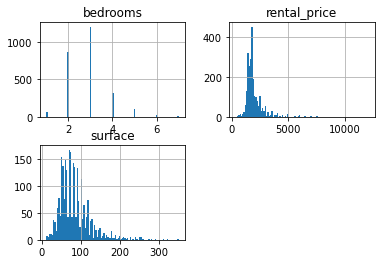

In [100]:
# Data doesn't look normally distributed
plt.figure(figsize=(14,7))
adam_postalcodes[['bedrooms', 'rental_price', 'surface']].hist(bins=100)

In [101]:
# Assumptions for correlation:
    # Use spearman rank correlation:
        # because you can use it with data of an (at least) ordinal scale
        # data doens't have to be normally distributed

#Hypothesis: postalcodes in the periphery have houses with a bigger surface 

In [106]:
adam_bed_mean = adam_postalcodes[['Name_neighbourhood','bedrooms']].groupby('Name_neighbourhood').mean()

In [110]:
adam_bed_mean.sort_values('bedrooms', ascending=False)

,bedrooms
Name_neighbourhood,
Diepenbrockbuurt,5.200
Emanuel van Meterenbuurt,5.000
Westhaven Noord,5.000
Gein Zuidwest,5.000
Buurt 9,5.000
...,...
Robert Scottbuurt West,1.875
Reigersbos Noord,1.500
Teleport,1.500
